## Q4: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def calculate_std_dev(a):
    avg = sum(a) / len(a)    
    sum_squares_diff = sum((x - avg)**2 for x in a)
    variance = sum_squares_diff / len(a)
    std_dev = math.sqrt(variance)
    
    return std_dev


random_array = np.random.rand(100000)  # Generating a random array with 100000 elements

start_time = time.time()
custom_std_dev = calculate_std_dev(random_array)
end_time = time.time()
custom_runtime = end_time - start_time

start_time = time.time()
numpy_std_dev = np.std(random_array)
end_time = time.time()
numpy_runtime = end_time - start_time



print("Custom Standard Deviation:", custom_std_dev)
print("NumPy Standard Deviation:", numpy_std_dev)
print("Custom function runtime:", custom_runtime, "seconds")
print("numpy function runtime:", numpy_runtime, "seconds")
print("diff. between custom and numpy function time is :", custom_runtime - numpy_runtime, "seconds")





Custom Standard Deviation: 0.28931269632669226
NumPy Standard Deviation: 0.2893126963266946
Custom function runtime: 0.08273744583129883 seconds
numpy function runtime: 0.0010061264038085938 seconds
diff. between custom and numpy function time is : 0.08173131942749023 seconds


In [2]:
#optional, repeat the function many times and plot histogram of time difference
#keep in mind it si really slow


n = 500                                 #histogram entries
h = np.zeros(n)                         #pre allocate array of entries
random_array = np.random.rand(100000)   #Generating a random array with 100000 elements


start_time = time.time()
numpy_std_dev = np.std(random_array)
end_time = time.time()
numpy_runtime = end_time - start_time

for i in range(n):
    start_time = time.time()
    custom_std_dev = calculate_std_dev(random_array)
    end_time = time.time()
    custom_runtime = end_time - start_time
    
    h[i] = custom_runtime - numpy_runtime
    



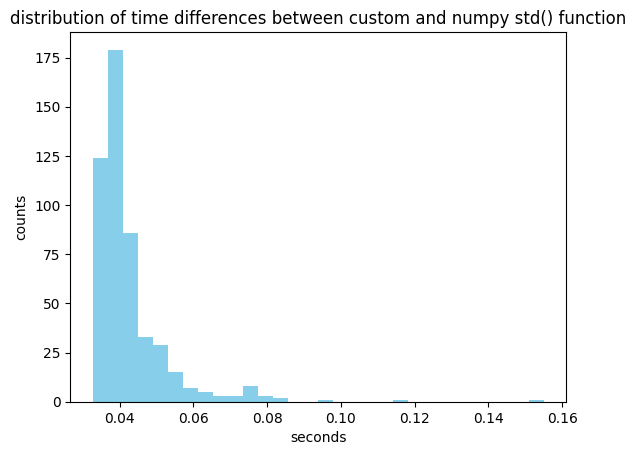

In [3]:
    
plt.hist(h, bins=30, color='skyblue')
plt.xlabel('seconds')
plt.ylabel('counts')
plt.title('distribution of time differences between custom and numpy std() function')
plt.show()


## Q4: Bootstraps

Bootstrapping is a prominent statistical technique to estimate errors when you're stuck and don't know what else to o: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means).


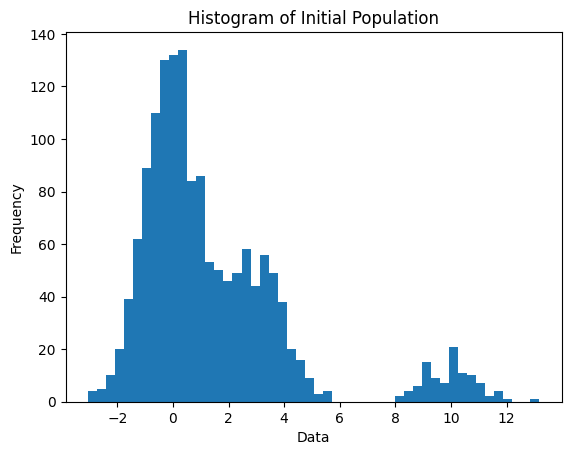

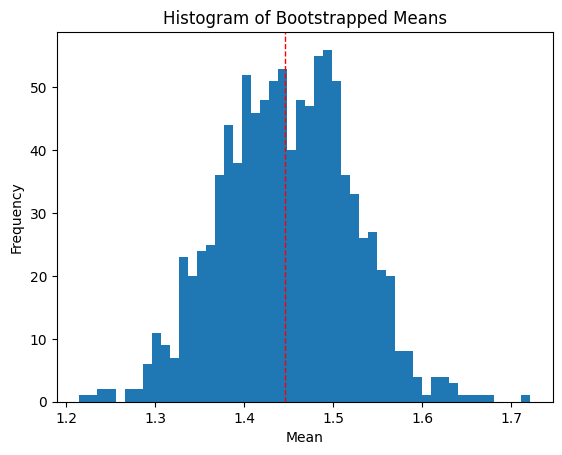

Bootstrapped 95% confidence intervals for the mean: [1.30506744 1.58443497]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_confidence_intervals(data, N):
    """Function to compute bootstrap confidence intervals"""
    means = []
    for i in range(N):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.percentile(means, [2.5, 97.5]), means


# Generate data (Gaussian distribution with outliers)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)
outliers = np.random.normal(loc=10, scale=1, size=100)
outliers2 = np.random.normal(loc=3, scale=1, size=400)
data_with_outliers = np.concatenate([data, outliers, outliers2])


# Number of bootstrap samples
N = 1000


# Compute bootstrap confidence intervals
confidence_intervals, means = bootstrap_confidence_intervals(data_with_outliers, N)

# Plot population
plt.hist(data_with_outliers, bins=50)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Initial Population')
plt.show()

# Plot histogram of means
plt.hist(means, bins=50)
plt.axvline(np.mean(data_with_outliers), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrapped Means')
plt.show()

print("Bootstrapped 95% confidence intervals for the mean:", confidence_intervals)
